# Visualization of Cairns example results

** So, it seems anuga replaces stdout and the notebook does not like it, so as seen in [this post](http://stackoverflow.com/questions/25494182/print-not-showing-in-ipython-notebook-python), I store the original and restore it afterwards **

In [1]:
import sys
stdout = sys.stdout

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import anuga

In [3]:
sys.stdout = stdout

Load info from .sww file

In [4]:
out = anuga.utilities.plot_utils.get_output('cairns_fixed_wave.sww',timeSlices='all') #vertex values

outc =  anuga.utilities.plot_utils.get_centroids(out) #centroid values

Plot grid and bathymetry

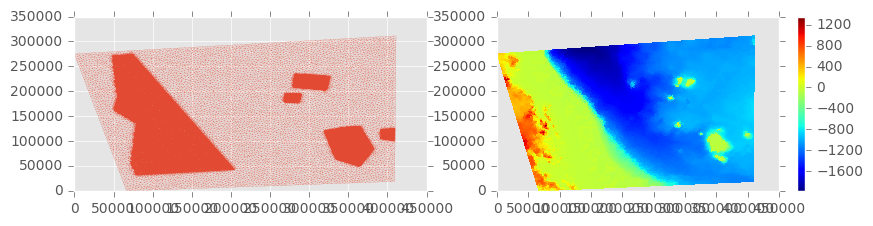

In [5]:
import matplotlib.tri as tri
triang = tri.Triangulation(out.x,out.y,out.vols)
plt.figure(figsize=(4*2.5,2.25))
plt.subplot(121)
plt.triplot(triang,lw=0.1)
plt.subplot(122)
plt.tripcolor(triang,outc.elev)
plt.colorbar()

Plot a few frames: TODO

```
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure(figsize=(4*1.25,2.25))
ax = plt.subplot(111)
triang.set_mask(outc.stage[0,:]-outc.elev<=1e-5)
p = ax.tripcolor(triang, outc.stage[0,:],vmin=outc.stage.min(),vmax=outc.stage.max())

def animate(i):
    triang.set_mask(outc.stage[i*int(outc.stage.shape[0]/10.),:]-outc.elev<=1e-5)
    ax.tripcolor(triang,outc.stage[i*int(outc.stage.shape[0]/10.),:],vmin=outc.stage.min(),vmax=outc.stage.max())
    return p,

animation.FuncAnimation(fig, animate, frames=10, interval=200)
```

Clear some memory

In [6]:
del out

## Generating and reading timeseries

In [7]:
anuga.sww2csv_gauges('cairns_fixed_wave.sww',
           'gauges.csv',
           quantities=['stage', 'speed','depth','elevation'],
           verbose=True)

Gauges obtained from: gauges.csv
File cairns_fixed_wave.sww exists
iterate over ['cairns_fixed_wave']
sww files=['cairns_fixed_wave']
Writing csv files
Caching: looking for cached files /home/jose/.python_cache/_file_function[-3370698667546596165]_{Result,Args,Admin}.z
Caching: Dependencies are ['/media/jose/Docs/github/anuga_examples/cairns/cairns_fixed_wave.sww']
+----------------------------------------------------------
| Sun Feb  5 22:59:04 2017. Caching statistics (retrieving)
+----------------------------------------------------------

| Function:     _file_function
| Argument:     '/media/jose/Docs/github/anuga_examples/cairns/cairns_fixed_wave.sww'
| Keyword Args: {'time_limit': None, 'interpolation_points': [[  367622.63  8128196.42]
 [  360245.11  8142280.78]
 [  386133.51  8131751.05]
 [  430250.    8128812.23]
 [  367771.61  8133933.82]], 'verbose': True, 'domain_starttime': None, 'boundary_polygon': None, 'quantities': ['stage', 'elevation', 'xmomentum',...
| CPU time:   

Generated files are:

In [9]:
ls gauge_*

gauge_Cairns Airport.csv*         gauge_Cairns_speed.png*
gauge_Cairns Airport_depth.png*   gauge_Cairns_stage.png*
gauge_Cairns Airport_speed.png*   gauge_Elford Reef.csv*
gauge_Cairns Airport_stage.png*   gauge_Elford Reef_depth.png*
gauge_Cairns.csv*                 gauge_Elford Reef_speed.png*
gauge_Cairns_depth.png*           gauge_Elford Reef_stage.png*
gauge_Cairns Headland.csv*        gauge_Trinity Beach.csv*
gauge_Cairns Headland_depth.png*  gauge_Trinity Beach_depth.png*
gauge_Cairns Headland_speed.png*  gauge_Trinity Beach_speed.png*
gauge_Cairns Headland_stage.png*  gauge_Trinity Beach_stage.png*


Generate automatic plots

In [11]:
anuga.csv2timeseries_graphs(directories_dic={'./': ['Fixed Wave',0,0]},
                      output_dir='.',
                      base_name='gauge_',
                      plot_numbers='',
                      quantities=['stage','speed','depth'],
                      extra_plot_name='',
                      assess_all_csv_files=True,                            
                      create_latex=False,
                      verbose=True)

Determining files to access for axes ranges.
Determining uniform axes
reading: ./gauge_Cairns Airport.csv
reading: ./gauge_Cairns Headland.csv
reading: ./gauge_Cairns.csv
reading: ./gauge_Elford Reef.csv
reading: ./gauge_Trinity Beach.csv
axis for quantity stage are x:(0.0 to 166.666666667)time (minutes) and y:(-4.67399694575 to 120.203244622)wave height (m)
axis for quantity speed are x:(0.0 to 166.666666667)time (minutes) and y:(-1.12305786235 to 32.1743843271)speed (m/s)
axis for quantity depth are x:(0.0 to 166.666666667)time (minutes) and y:(-0.825149562988 to 80.1976310504)water depth (m)
Now start to plot
Plotting in ./ []
Starting gauge_Cairns
saving figure here ./gauge_Cairns_stage.png


/home/jose/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/jose/miniconda2/lib/python2.7/site-packages/anuga/abstract_2d_finite_volumes/util.py:737: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if list == None: log.critical('List must be provided')


saving figure here ./gauge_Cairns_speed.png
saving figure here ./gauge_Cairns_depth.png
Starting gauge_Cairns Airport
saving figure here ./gauge_Cairns Airport_stage.png
saving figure here ./gauge_Cairns Airport_speed.png
saving figure here ./gauge_Cairns Airport_depth.png
Starting gauge_Cairns Headland
saving figure here ./gauge_Cairns Headland_stage.png
saving figure here ./gauge_Cairns Headland_speed.png
saving figure here ./gauge_Cairns Headland_depth.png
Starting gauge_Elford Reef
saving figure here ./gauge_Elford Reef_stage.png
saving figure here ./gauge_Elford Reef_speed.png
saving figure here ./gauge_Elford Reef_depth.png
Starting gauge_Trinity Beach
saving figure here ./gauge_Trinity Beach_stage.png
saving figure here ./gauge_Trinity Beach_speed.png
saving figure here ./gauge_Trinity Beach_depth.png
Closing all plots
Finished closing plots


Check on one

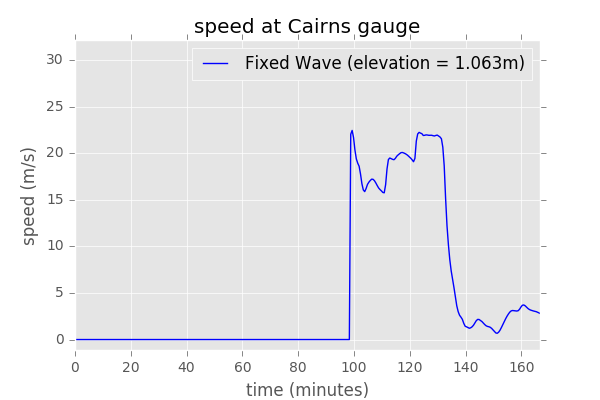

In [12]:
from IPython.display import Image

Image('gauge_Cairns_speed.png')